# Recommender Portion

In [41]:
import pandas as pd

In [42]:
ings = pd.read_csv('1. Recipe_Ingredients.csv')
recipes = pd.read_csv('1. Recipe_Reviews.csv')

In [43]:
recipes.head()

,name,cook_time,review,rating,category,url
0,Air Fryer Chicken Parmesan,40.0,recently tried air fryer chicken parmesan life...,4.5,Air Fryer Recipes,https://www.allrecipes.com/air-fryer-chicken-p...
1,Air Fryer Chicken Parmesan,40.0,recently tried air fryer chicken parmesan life...,4.5,Air Fryer Recipes,https://www.allrecipes.com/air-fryer-chicken-p...
2,Chocolate Angel Food Cake I,90.0,excellent angel food cake satisfying chocolate...,4.7,Angel Food Cakes,https://www.allrecipes.com/recipe/8252/chocola...
3,Chocolate Angel Food Cake I,90.0,yummy 've made twice times huge success textur...,4.7,Angel Food Cakes,https://www.allrecipes.com/recipe/8252/chocola...
4,Chocolate Angel Food Cake I,90.0,super easy recipe follow simply separate eggs ...,4.7,Angel Food Cakes,https://www.allrecipes.com/recipe/8252/chocola...


In [44]:
ings.head()

,Name,Ingredients
0,15-Minute Butter Gnocchi with Spicy Chili Cris...,"['gnocchi', 'butter', 'caper', 'chili crisp oi..."
1,3-Ingredient Banana Oatmeal Cookies,"['banana', 'oat', 'raisin']"
2,3-Ingredient Peanut Butter Oatmeal Cookies,"['butter', 'maple syrup', 'oat']"
3,4 Ingredient Lemon Pound Cake,"['egg', 'sweetened condensed milk', 'fresh lem..."
4,4-Ingredient Keto Peanut Butter Cookies,"['butter', 'lowcalorie natural sweetener', 'eg..."


## EDA

4493

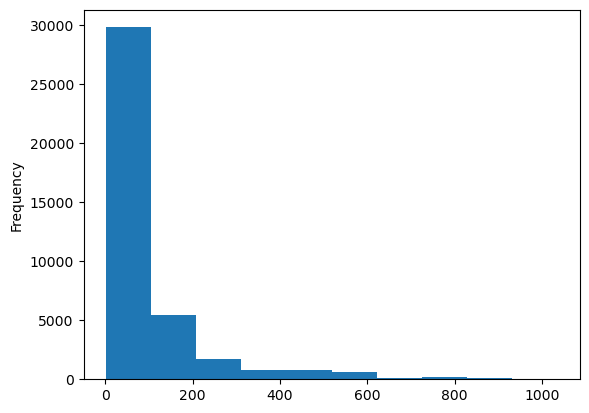

In [45]:
recipes['cook_time'].plot(kind='hist')
len(recipes[recipes['cook_time']>200])

In [46]:
rs = recipes.drop('review',axis=1)
rs.head()

,name,cook_time,rating,category,url
0,Air Fryer Chicken Parmesan,40.0,4.5,Air Fryer Recipes,https://www.allrecipes.com/air-fryer-chicken-p...
1,Air Fryer Chicken Parmesan,40.0,4.5,Air Fryer Recipes,https://www.allrecipes.com/air-fryer-chicken-p...
2,Chocolate Angel Food Cake I,90.0,4.7,Angel Food Cakes,https://www.allrecipes.com/recipe/8252/chocola...
3,Chocolate Angel Food Cake I,90.0,4.7,Angel Food Cakes,https://www.allrecipes.com/recipe/8252/chocola...
4,Chocolate Angel Food Cake I,90.0,4.7,Angel Food Cakes,https://www.allrecipes.com/recipe/8252/chocola...


In [47]:
rs = rs[['name','cook_time','rating','category']].drop_duplicates()

In [48]:
rs.head()

,name,cook_time,rating,category
0,Air Fryer Chicken Parmesan,40.0,4.5,Air Fryer Recipes
2,Chocolate Angel Food Cake I,90.0,4.7,Angel Food Cakes
47,Angel Food Cake,70.0,4.6,Angel Food Cakes
147,Sicilian Eggplant Caponata,90.0,4.9,Antipasti
228,Best Caprese Skewers,15.0,4.7,Antipasti


90

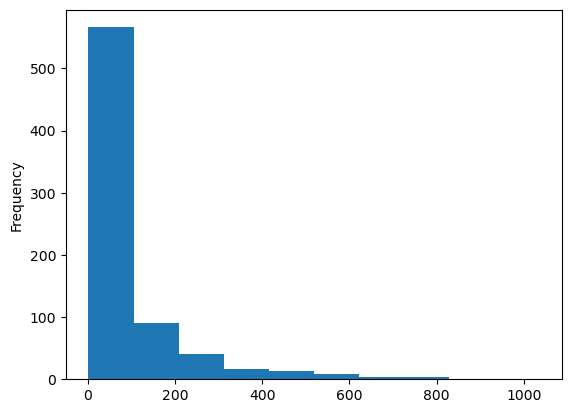

In [49]:
rs['cook_time'].plot(kind='hist')
len(rs[rs['cook_time']>200])

In [50]:
rs[rs['cook_time']<200].describe()

,cook_time,rating
count,652.00000,652.000000
mean,61.48773,4.610123
std,41.18485,0.381269
min,2.00000,1.700000
25%,30.00000,4.500000
50%,50.00000,4.700000
75%,80.00000,4.800000
max,195.00000,5.000000


In [51]:
rs['cook_time_quartiles'] = pd.qcut(rs['cook_time'], q=6, labels=['Quick', 'Speedy', 'Moderate', 'Leisurely','Extended','Lengthy'])


In [52]:
rs.head()

,name,cook_time,rating,category,cook_time_quartiles
0,Air Fryer Chicken Parmesan,40.0,4.5,Air Fryer Recipes,Speedy
2,Chocolate Angel Food Cake I,90.0,4.7,Angel Food Cakes,Extended
47,Angel Food Cake,70.0,4.6,Angel Food Cakes,Leisurely
147,Sicilian Eggplant Caponata,90.0,4.9,Antipasti,Extended
228,Best Caprese Skewers,15.0,4.7,Antipasti,Quick


In [53]:
len(rs['category'].drop_duplicates()) # there are 330 unique categories in this dataset 

330

In [54]:
rs['category'].drop_duplicates()

0        Air Fryer Recipes
2         Angel Food Cakes
147              Antipasti
339              Apple Pie
346             Applesauce
               ...        
39207              Whole30
39258         Whoopie Pies
39558                 Yams
39746                 Ziti
39864      Zucchini Breads
Name: category, Length: 330, dtype: object

In [55]:
df = pd.DataFrame(rs)

# List of keywords associated with baked goods
baked_goods_keywords = ['cake', 'bread', 'pie', 'pastry', 'cookie', 'tart', 'muffin', 'scone', 'brownie', 'biscuit', 'roll', 'bun']

# Function to label baked goods based on keywords
def label_baked_goods(row):
    for keyword in baked_goods_keywords:
        if keyword.lower() in row.lower():
            return "baked_goods"
    return None

# Apply the function to create a new column
df['baked_goods'] = df['name'].apply(label_baked_goods)

# Display the DataFrame with the new column
df.head()

,name,cook_time,rating,category,cook_time_quartiles,baked_goods
0,Air Fryer Chicken Parmesan,40.0,4.5,Air Fryer Recipes,Speedy,None
2,Chocolate Angel Food Cake I,90.0,4.7,Angel Food Cakes,Extended,baked_goods
47,Angel Food Cake,70.0,4.6,Angel Food Cakes,Leisurely,baked_goods
147,Sicilian Eggplant Caponata,90.0,4.9,Antipasti,Extended,None
228,Best Caprese Skewers,15.0,4.7,Antipasti,Quick,None


In [56]:
df = pd.DataFrame(rs)

# Keyword lists for each category
categories = {
    'baked_goods': [
        'cake','pie', 'pastry', 'cookie', 'tart', 'muffin', 'scone', 'brownie' 
        'pound cake', 'gnocchi', 'doughnut', 'croissant', 'fritter', 'danish', 'loaf', 'crust', 'shortbread', 
        'waffle', 'pancake', 'cobbler', 'twist', 'galette', 'kolache', 'crumble','blondies','snickerdoodles','treats','bars',
        'balls','french toast','ginger snaps','gingersnaps','granola','blossoms','twinkies','capirotada',
        'Panettone','divinity','Sufganiyot','Hamantaschen','brownies'

    ],
    'breads': [
        'bread', 'gnocchi', 'doughnut', 'croissant', 'bagel', 'fritter', 'danish', 'loaf', 'crust', 'bun', 'biscuit', 
        'roll', 'focaccia', 'pretzels', 'chapati', 'matzah', 'panettone', 'chapati', 'baguette', 'brioche', 'naan', 'ciabatta','popover','tortilla',
        'biscuit', 'roll', 'bun', 'bread', 'chapati','matzah','bagel',

    ],
    'main_dish': [
        'pasta', 'chicken', 'beef', 'pork', 'lamb', 'seafood', 'fish', 'shrimp', 'stew', 'casserole', 'lasagna', 
        'meatball', 'meatloaf', 'steak', 'taco', 'enchilada', 'burrito', 'burger', 'sausage', 'fillet', 'brisket', 
        'ribs', 'cutlet', 'poultry', 'veal', 'duck', 'turkey', 'moussaka', 'quiche', 'parmesan', 'gyro', 'ravioli', 
        'stuffed', 'stromboli', 'baked ziti', 'carbonara', 'stroganoff', 'roast', 'doner', 'hotdish','authentic','ziti','caponata','strata',
        'tortellini','sloppy joes','tamales','sushi','chilaquiles','chiles','vegan','souffl','rib','risotto','brown bears','foil packets',
        'pizza','salmon','empanadas','empanada','totchos','falafel','filet','carnitas','Jambalaya','yogurt','paella','omelette','oatmeal','omelet',
        'korean bbq','rigatoni','Perogies','pancit','chili','Spaghetti','linguine','Sandwich','panini','oats','Mincemeat','Manicotti',
        'Frittata','pastie','koshary','Copycat Onion Wrapped Flying Dutchman','tri tip'

    ],
    'appetizer': [
        'appetizer', 'snack', 'dip', 'bruschetta', 'finger food', 'nachos', 'spring roll', 'dumpling', 'wings', 
        'skewers', 'canape', 'slider', 'bite', 'spread', 'platter', 'chips', 'guacamole', 'hummus', 'tapas', 
        'stuffed', 'jalapeno', 'firecrackers', 'deviled eggs', 'tartlets', 'crackers', 'samosa', 'taquitos','arancini','cheese','biscotti',
        'pickles','Bruschetta','colonnata','sambusa','quesadillas','blanket','pate','Pâté','pad thai','jerky','fried green tomatoes',
        'bacon-wrapped cherries','cilbir'
        
    ],
    'soups_stews': [
        'soup', 'stew', 'broth', 'chowder', 'bisque', 'gazpacho', 'gumbo', 'minestrone', 'bouillabaisse', 'consomme', 
        'goulash', 'pho', 'ramen', 'hotpot'
    ],
    'desserts_sweets': [
        'dessert', 'ice cream', 'frozen', 'gelato', 'sorbet', 'pudding', 'candy', 'sweet', 'custard', 'truffle', 
        'fudge', 'tiramisu', 'popsicle', 'macaroon', 'cheesecake', 'meringue', 'pavlova','snowballs','bonbons','mousse',
        'toffee','torte','Crème Brûlée','halwa','arroz con leche','fondant','pumpkin seeds','flan','icing','Macarons','jam','marmalade'
    ],
    'beverages': [
        'smoothie', 'shake', 'drink', 'cocktail', 'juice', 'tea', 'coffee', 'punch', 'lemonade', 'mojito', 'latte', 
        'espresso', 'frappe', 'chai', 'soda', 'sangria', 'margarita','bloody mary','canadian caesar','banana milk','martini','eggnog',
        'shots'
    ],
    'sauces_salsa': [
        'sauce', 'salsa', 'pesto', 'guacamole', 'dressing', 'aioli', 'marinade', 'chutney', 'gravy', 'dip', 'spread', 
        'condiment', 'relish', 'topping','ceviche','seasoning blend'
    ],
    'salad': [
        'salad', 'coleslaw', 'slaw', 'greens', 'lettuce', 'vinaigrette'
    ],
    'sides': [
        'side', 'fries', 'chips', 'potato', 'rice', 'grains', 'vegetable', 'roasted', 'baked', 'mashed', 'stuffed', 
        'beans', 'corn', 'casserole', 'quinoa', 'pasta salad','yams','asparagus','broccoli','grits','Spicy Korean Red Pepper Cucumbers',
        'Instant Pot Wheat Berries','Tzimmes'
    ]
}
# Function to label category type based on the keyword lists
def label_category_type(row):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in row.lower():
                return category
    return 'other'  # Return 'other' if no category matches

# Apply the function to create the new 'category_type' column
df['category_type'] = df['name'].apply(label_category_type)

# Display the DataFrame with the new column
df.head()


,name,cook_time,rating,category,cook_time_quartiles,category_type
0,Air Fryer Chicken Parmesan,40.0,4.5,Air Fryer Recipes,Speedy,main_dish
2,Chocolate Angel Food Cake I,90.0,4.7,Angel Food Cakes,Extended,baked_goods
47,Angel Food Cake,70.0,4.6,Angel Food Cakes,Leisurely,baked_goods
147,Sicilian Eggplant Caponata,90.0,4.9,Antipasti,Extended,main_dish
228,Best Caprese Skewers,15.0,4.7,Antipasti,Quick,appetizer


In [57]:
# Get the count of dishes in each category, including 'other'
category_counts = df['category_type'].value_counts()

# Display the counts for each category
print(category_counts)


category_type
main_dish          306
baked_goods        189
appetizer           62
breads              39
desserts_sweets     39
sides               31
soups_stews         29
salad               21
beverages           17
sauces_salsa        16
other                1
Name: count, dtype: int64


## Filter out Common Allergies: 

- gluten
- Peanuts
- Tree nuts
- Shellfish
- Fish
- Soy
- Dairy 

In [58]:
# User input allergies (list of common allergies)
user_allergies = input("Please list your allergies. If none, click enter: ").lower().split(", ")

# Common allergy keywords to filter out
allergy_keywords = {
    'gluten': ['wheat', 'barley', 'rye', 'bread', 'flour', 'pasta'],
    'peanuts': ['peanut','peanuts'],
    'tree nuts': ['almond', 'walnut', 'cashew', 'pecan', 'hazelnut'],
    'shellfish': ['shrimp', 'crab', 'lobster', 'scallops', 'oysters'],
    'fish': ['salmon', 'tuna', 'cod', 'trout', 'tilapia'],
    'soy': ['soy', 'soybean', 'tofu'],
    'dairy': ['milk', 'butter', 'cheese', 'yogurt', 'cream']
}

# Flatten allergy keywords into a single list based on user input
allergens_to_filter = []
for allergy in user_allergies:
    if allergy in allergy_keywords:
        allergens_to_filter.extend(allergy_keywords[allergy])

# Function to check if any allergens are in the recipe
def contains_allergen(ingredients):
    return any(allergen in ingredients for allergen in allergens_to_filter)

# Filter the dataset
filtered_df = ings[~ings['Ingredients'].apply(lambda ingredients: contains_allergen(ingredients))]

# Output the filtered DataFrame
filtered_df


,Name,Ingredients
0,15-Minute Butter Gnocchi with Spicy Chili Cris...,"['gnocchi', 'butter', 'caper', 'chili crisp oi..."
1,3-Ingredient Banana Oatmeal Cookies,"['banana', 'oat', 'raisin']"
2,3-Ingredient Peanut Butter Oatmeal Cookies,"['butter', 'maple syrup', 'oat']"
3,4 Ingredient Lemon Pound Cake,"['egg', 'sweetened condensed milk', 'fresh lem..."
4,4-Ingredient Keto Peanut Butter Cookies,"['butter', 'lowcalorie natural sweetener', 'eg..."
...,...,...
743,Yogurt Parfait,"['vanilla yogurt', 'granola', 'blackberry']"
745,Yummy Vegan Pesto,"['pine nut', 'olive oil', 'garlic', 'nutrition..."
747,Zucchini Pizza Bites,"['zucchini inch thick round', 'pizza sauce tas..."
748,Zucchini Roll Lasagna on Turkey Bolognese,"['ricotta cheese', 'packed parmigiano reggiano..."


In [59]:
# Initial setup to gather allergies
more = input('Do you have any more allergies? Y/N: ').lower()

# List to collect all user allergies
user_allergies = []

while more == 'y':
    # Add new allergies to the list
    new_allergies = input("Please type your next allergy. If none, press enter: ").lower().split(", ")
    user_allergies.extend(new_allergies)  # Accumulate all allergies

    more = input('Do you have any more allergies? Y/N: ').lower()

# Common allergy keywords to filter out
allergy_keywords = {
    'gluten': ['wheat', 'barley', 'rye', 'bread', 'flour', 'pasta', 'gnocchi'],
    'peanuts': ['peanut'],
    'tree nuts': ['almond', 'walnut', 'cashew', 'pecan', 'hazelnut'],
    'shellfish': ['shrimp', 'crab', 'lobster', 'scallops', 'oysters'],
    'fish': ['salmon', 'tuna', 'cod', 'trout', 'tilapia'],
    'soy': ['soy', 'soybean', 'tofu'],
    'dairy': ['milk', 'butter', 'cheese', 'yogurt', 'cream']
}

# Flatten allergy keywords into a single list based on user input
allergens_to_filter = []
for allergy in user_allergies:
    if allergy in allergy_keywords:
        allergens_to_filter.extend(allergy_keywords[allergy])

# Function to check if any allergens are in the recipe
def contains_allergen(ingredients):
    return any(allergen in ingredients for allergen in allergens_to_filter)

# Filter the dataset
allergy_df = filtered_df[~filtered_df['Ingredients'].apply(lambda ingredients: contains_allergen(ingredients))]

# Output the filtered DataFrame
print(allergy_df)


                                                  Name  \
0    15-Minute Butter Gnocchi with Spicy Chili Cris...   
1                  3-Ingredient Banana Oatmeal Cookies   
2           3-Ingredient Peanut Butter Oatmeal Cookies   
3                        4 Ingredient Lemon Pound Cake   
4              4-Ingredient Keto Peanut Butter Cookies   
..                                                 ...   
743                                     Yogurt Parfait   
745                                  Yummy Vegan Pesto   
747                               Zucchini Pizza Bites   
748          Zucchini Roll Lasagna on Turkey Bolognese   
749                Zucchini and Asparagus Orzo Risotto   

                                           Ingredients  
0    ['gnocchi', 'butter', 'caper', 'chili crisp oi...  
1                          ['banana', 'oat', 'raisin']  
2                     ['butter', 'maple syrup', 'oat']  
3    ['egg', 'sweetened condensed milk', 'fresh lem...  
4    ['butter', 'l

In [60]:
# Save to CSV
allergy_df.to_csv("2. Allergy_Filtered.csv", index = False)